Assessment Task


Suggested possible analysis 

- What are the most important features for predicting X as a target variable?
- Which classification approach do you prefer for the prediction of X as a target variable, and why? o How to classify the loyal and churn customers using Support Vector Machines?
- Why is dimensionality reduction important in machine learning?

The pair would need to consider the following instructions (a - d) during the development of this pair project.
a) Logical justification based on the reasoning for the specific choice of machine learning approaches.
b) Multiple machine learning approaches (at least two) using hyperparameters and a comparison
between the chosen modelling approaches.
 c) Visualise your comparison of ML modelling outcomes. You may use a statistical approach to argue that one feature is more important than other features (for example, using PCA).
d) Cross-validation methods should be used to justify the authenticity of your ML results.
Your pair will present their findings and defend the results in the report (MS Doc or Open word format) by highlighting their individual contribution. Your report should capture the following aspects that are relevant
to 1.
2.
3.
4.
5.
your project investigations.
Motivation, a description of the problem domain, and an explanation of how the project's goals are justified using Prediction / Classification / Clustering Rules / Dimensionality Reduction etc..
(10 marks) Characterization of data, explanation and description of techniques used for the variation in the
accuracy across three training splits (10% / 20%/ 30%) using cross validation techniques.
(30 marks) Interpret and explain the results obtained, discuss overfitting / underfitting / generalisation, provide a rationale for the chosen model and use visualisations to support your findings. Comments in Python code, conclusions of the project should be specified at the end of the report. Harvard Style must be
used for citations and references.
(20 marks) Each team member presents a PowerPoint presentation of their work (maximum 5 slides) to emphasize their distinctive contributions based on their involvement in the project's conceptual
understanding, code development, and deployment.
(20 marks individual) Each team member fully described their individual contributions to the project in a reflective journal, using at least 500 to 700 words as well as images, diagrams, figures, and visualizations to elaborate
his/ her work.
Submission Requirements
All assessment submissions must meet the minimum requirements listed below. Failure to do so may have implications for the marks awarded.
● The code and datasets should be provided and uploaded in zip format on Moodle.
● Clearly detail the number of words used in the report.
● Number of Words in the report (2000 words +/-10%) excluding diagrams, code, references and
titles. Number of words used to express individual contributions is part of the mentioned words.
● In the case of individual submission, students will submit a (1000 words +/-10%) report.
● Describe the contribution of each team member in the project clearly and use a bar chart or pie
chart to represent the effort and time spent during this project. Use version control like Github or any other tool to show the progress of both team members in CA1. You should have at least 5 commits on Github before submission.
● The rubric is provided for the detailed breakdown of marks at the end of this CA1.
● Use Harvard Referencing when citing third party material
● Be the student’s own work.
● Include the CCT assessment cover page.
● Be submitted by the deadline date specified or be subject to late submission penalties
(20 marks individual)
 
● Note: The names of pair members must be uploaded on the link provided on Moodle until 15th October 2023 (23:59).
● Must be clearly specified the number of words used after each section in the report.

# DO CROSS VALIDATION AND ANN

In [43]:
%matplotlib inline

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import ipywidgets

sns.set()

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn import metrics

from sklearn.preprocessing import StandardScaler

# EDA

In [2]:
bike = pd.read_csv("Seoul_Bike.csv")

DOI
10.24432/C5F62R
License
This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license.
This allows for the sharing and adaptation of the datasets for any purpose, provided that the appropriate credit is given.

https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand


In [3]:
bike.head(3)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes

In [4]:
bike.shape

(8760, 14)

In [5]:
bike.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

## Changing from categorical to numerical

In [7]:
bike["Seasons"].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [8]:
bike["Holiday"].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [9]:
bike["Functioning Day"].unique()

array(['Yes', 'No'], dtype=object)

In [10]:
bike['Seasons'].replace('Winter', 0, inplace = True)
bike['Seasons'].replace('Spring', 1, inplace = True)
bike['Seasons'].replace('Summer', 2, inplace = True)
bike['Seasons'].replace('Autumn', 3, inplace = True)

In [11]:
bike['Seasons'].tail(2)

8758    3
8759    3
Name: Seasons, dtype: int64

In [12]:
bike["Holiday"].replace('No Holiday', 0, inplace = True)
bike["Holiday"].replace('Holiday', 1, inplace = True)

In [13]:
bike["Holiday"].tail(2)

8758    0
8759    0
Name: Holiday, dtype: int64

In [14]:
bike["Functioning Day"].replace('No', 0, inplace = True)
bike["Functioning Day"].replace('Yes', 1, inplace = True)

In [15]:
bike["Functioning Day"].tail(2)

8758    1
8759    1
Name: Functioning Day, dtype: int64

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

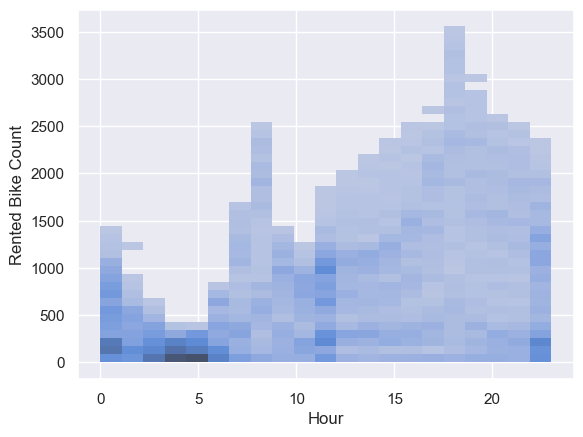

In [16]:
sns.histplot(data = bike, y = "Rented Bike Count", x = "Hour")

<Axes: xlabel='Holiday', ylabel='Count'>

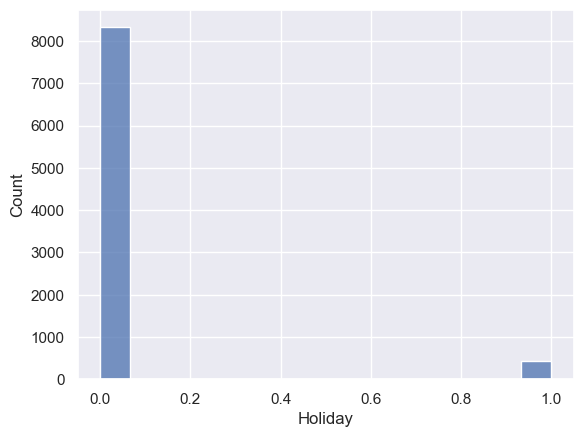

In [17]:
sns.histplot(data = bike, x = "Holiday")

The locals use more the bikes than the turists

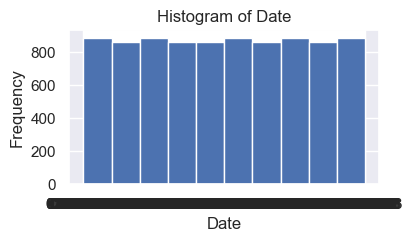

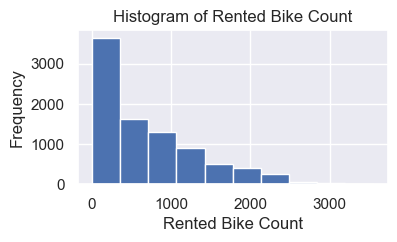

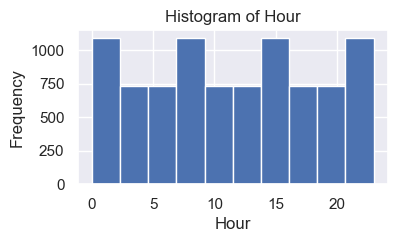

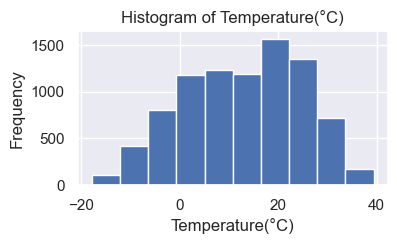

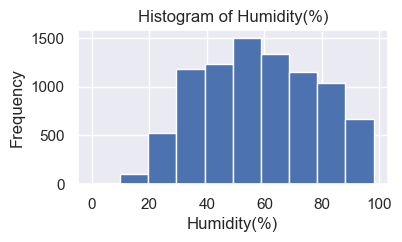

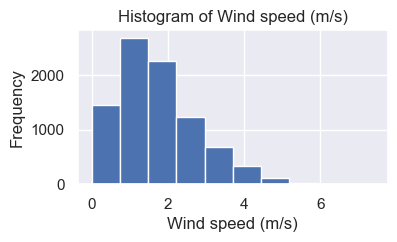

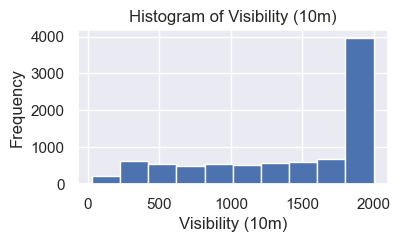

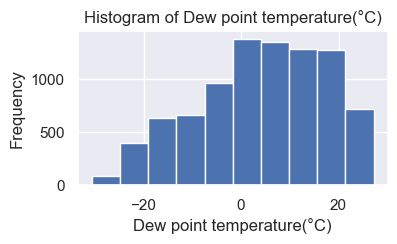

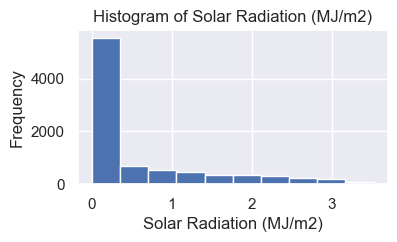

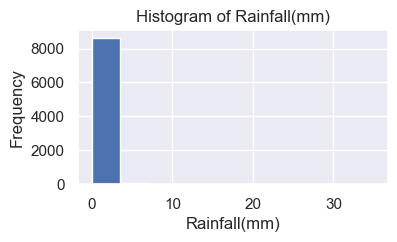

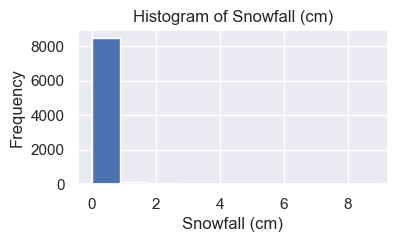

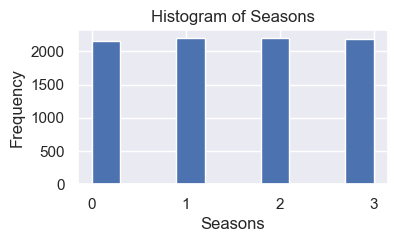

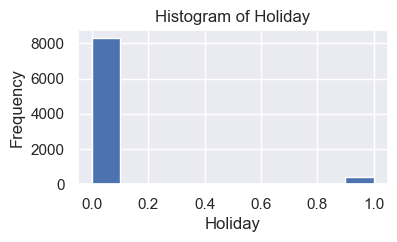

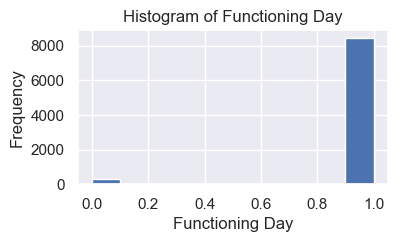

In [18]:
for column in bike.columns:
    plt.figure(figsize=(4, 2))
    plt.hist(bike[column], bins=10)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

<Axes: xlabel='Rented Bike Count', ylabel='Count'>

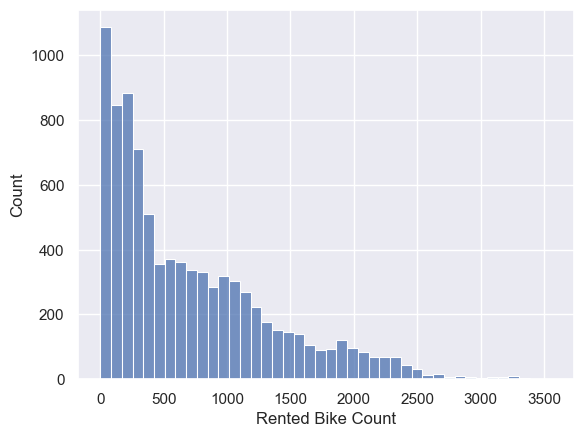

In [45]:
sns.histplot(data = bike, x = "Rented Bike Count")



<Axes: xlabel='Temperature(°C)', ylabel='Count'>

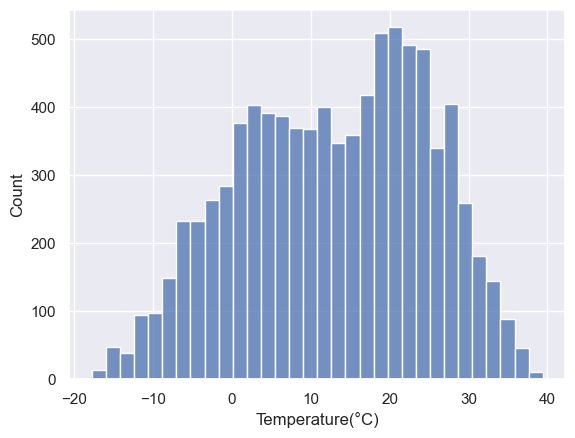

In [46]:
sns.histplot(data = bike, x = "Temperature(°C)")



<Axes: xlabel='Humidity(%)', ylabel='Count'>

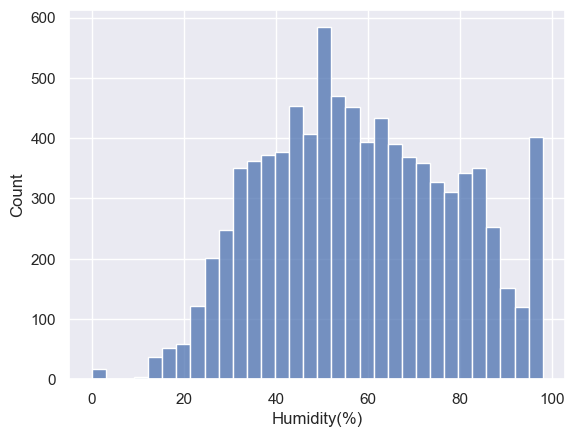

In [47]:
sns.histplot(data = bike, x = "Humidity(%)")



<Axes: xlabel='Wind speed (m/s)', ylabel='Count'>

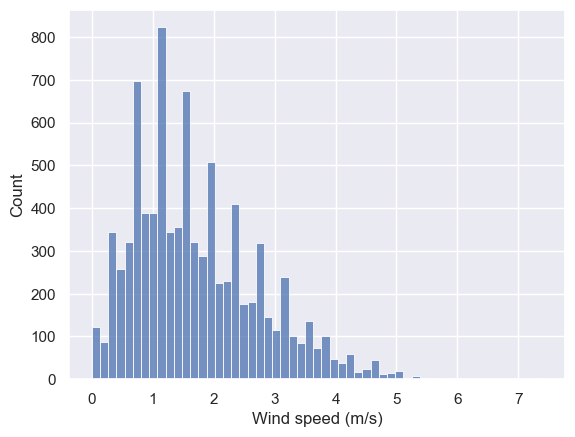

In [48]:
sns.histplot(data = bike, x = "Wind speed (m/s)")



<Axes: xlabel='Visibility (10m)', ylabel='Count'>

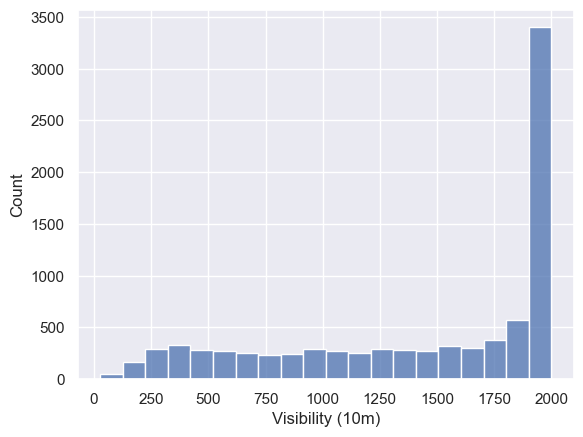

In [49]:
sns.histplot(data = bike, x = "Visibility (10m)")



<Axes: xlabel='Dew point temperature(°C)', ylabel='Count'>

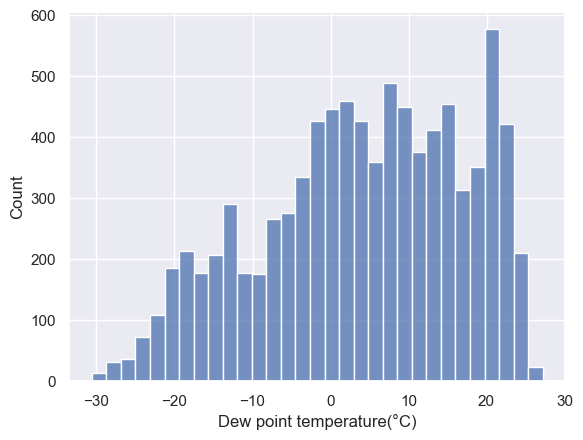

In [50]:
sns.histplot(data = bike, x = "Dew point temperature(°C)")



<Axes: xlabel='Solar Radiation (MJ/m2)', ylabel='Count'>

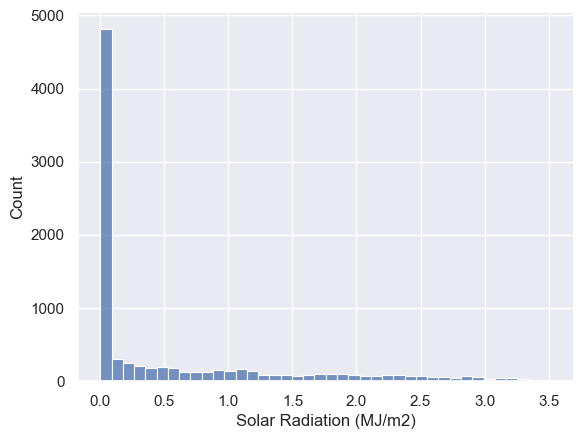

In [51]:
sns.histplot(data = bike, x = "Solar Radiation (MJ/m2)")


ValueError: 'locs' must be 1D with shape (M,). Your input has shape ().

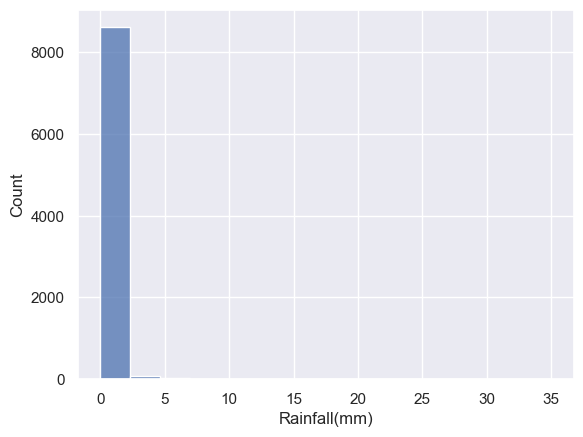

In [59]:
sns.histplot(data = bike, x = "Rainfall(mm)")
plt.xticks(0, 5)

In [56]:
#sns.histplot(data = bike, x = "Rainfall(mm)")




# Create a histogram
plt.hist(bike, bins = range(min(0), max(35) + 1), edgecolor='black')

# Add labels and title
plt.xlabel("Rainfall(mm)")
plt.xticks(0, 35, 5)
plt.ylabel('Frequency')
plt.title('Histogram')

# Display the plot
plt.show()


TypeError: 'int' object is not iterable

<Axes: xlabel='Snowfall (cm)', ylabel='Count'>

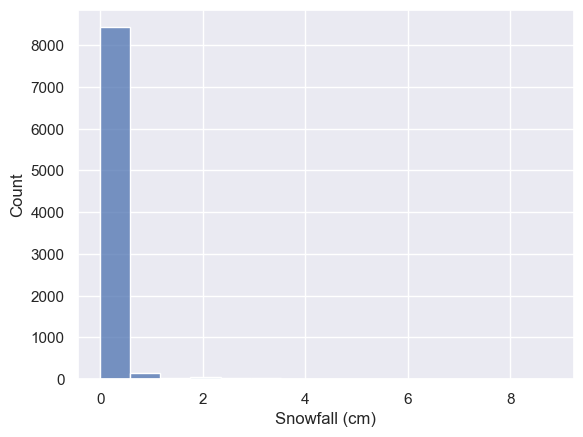

In [53]:
sns.histplot(data = bike, x = "Snowfall (cm)")

<Axes: xlabel='Seasons', ylabel='Count'>

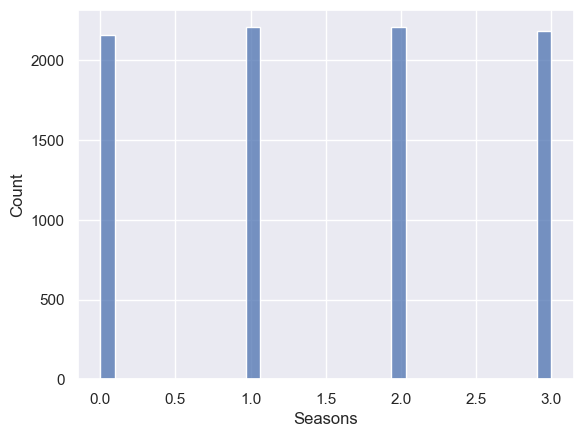

In [19]:
sns.histplot(data = bike, x = "Seasons")

The bikes have been used equally throughout the seasons 

In [20]:
bike.head(1)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Seasons  Holiday  \
0                      0.0           0.0            0.0        0        0   

   Functioning Day  
0                1

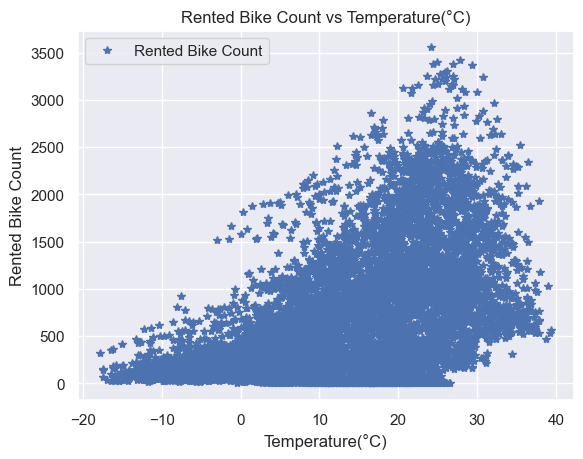

In [21]:
bike.plot(x = "Temperature(°C)", y = "Rented Bike Count", style = "*")
plt.title("Rented Bike Count vs Temperature(°C)")
plt.xlabel("Temperature(°C)")
plt.ylabel("Rented Bike Count")
plt.show()

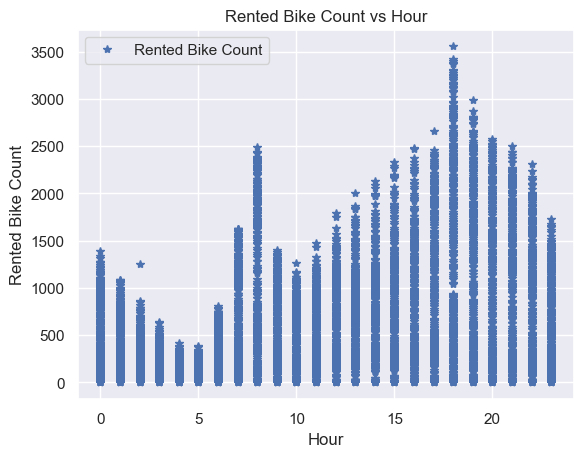

In [22]:
bike.plot(x = "Hour", y = "Rented Bike Count", style = "*")
plt.title("Rented Bike Count vs Hour")
plt.xlabel("Hour")
plt.ylabel("Rented Bike Count")
plt.show()

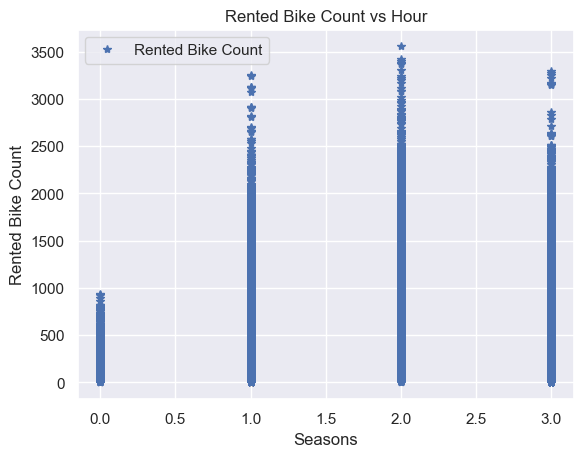

In [23]:
bike.plot(x = "Seasons", y = "Rented Bike Count", style = "*")
plt.title("Rented Bike Count vs Hour")
plt.xlabel("Seasons")
plt.ylabel("Rented Bike Count")
plt.show()

The seasons have the same amount of observations but the number of rented bikes are different between seasons

<Axes: xlabel='Seasons', ylabel='Rented Bike Count'>

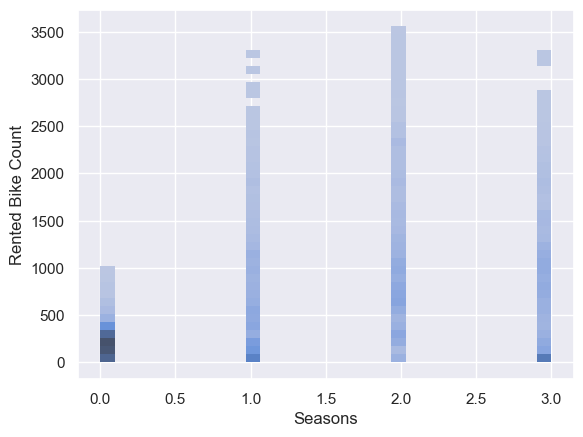

In [24]:
sns.histplot(data = bike, x = "Seasons", y = "Rented Bike Count")

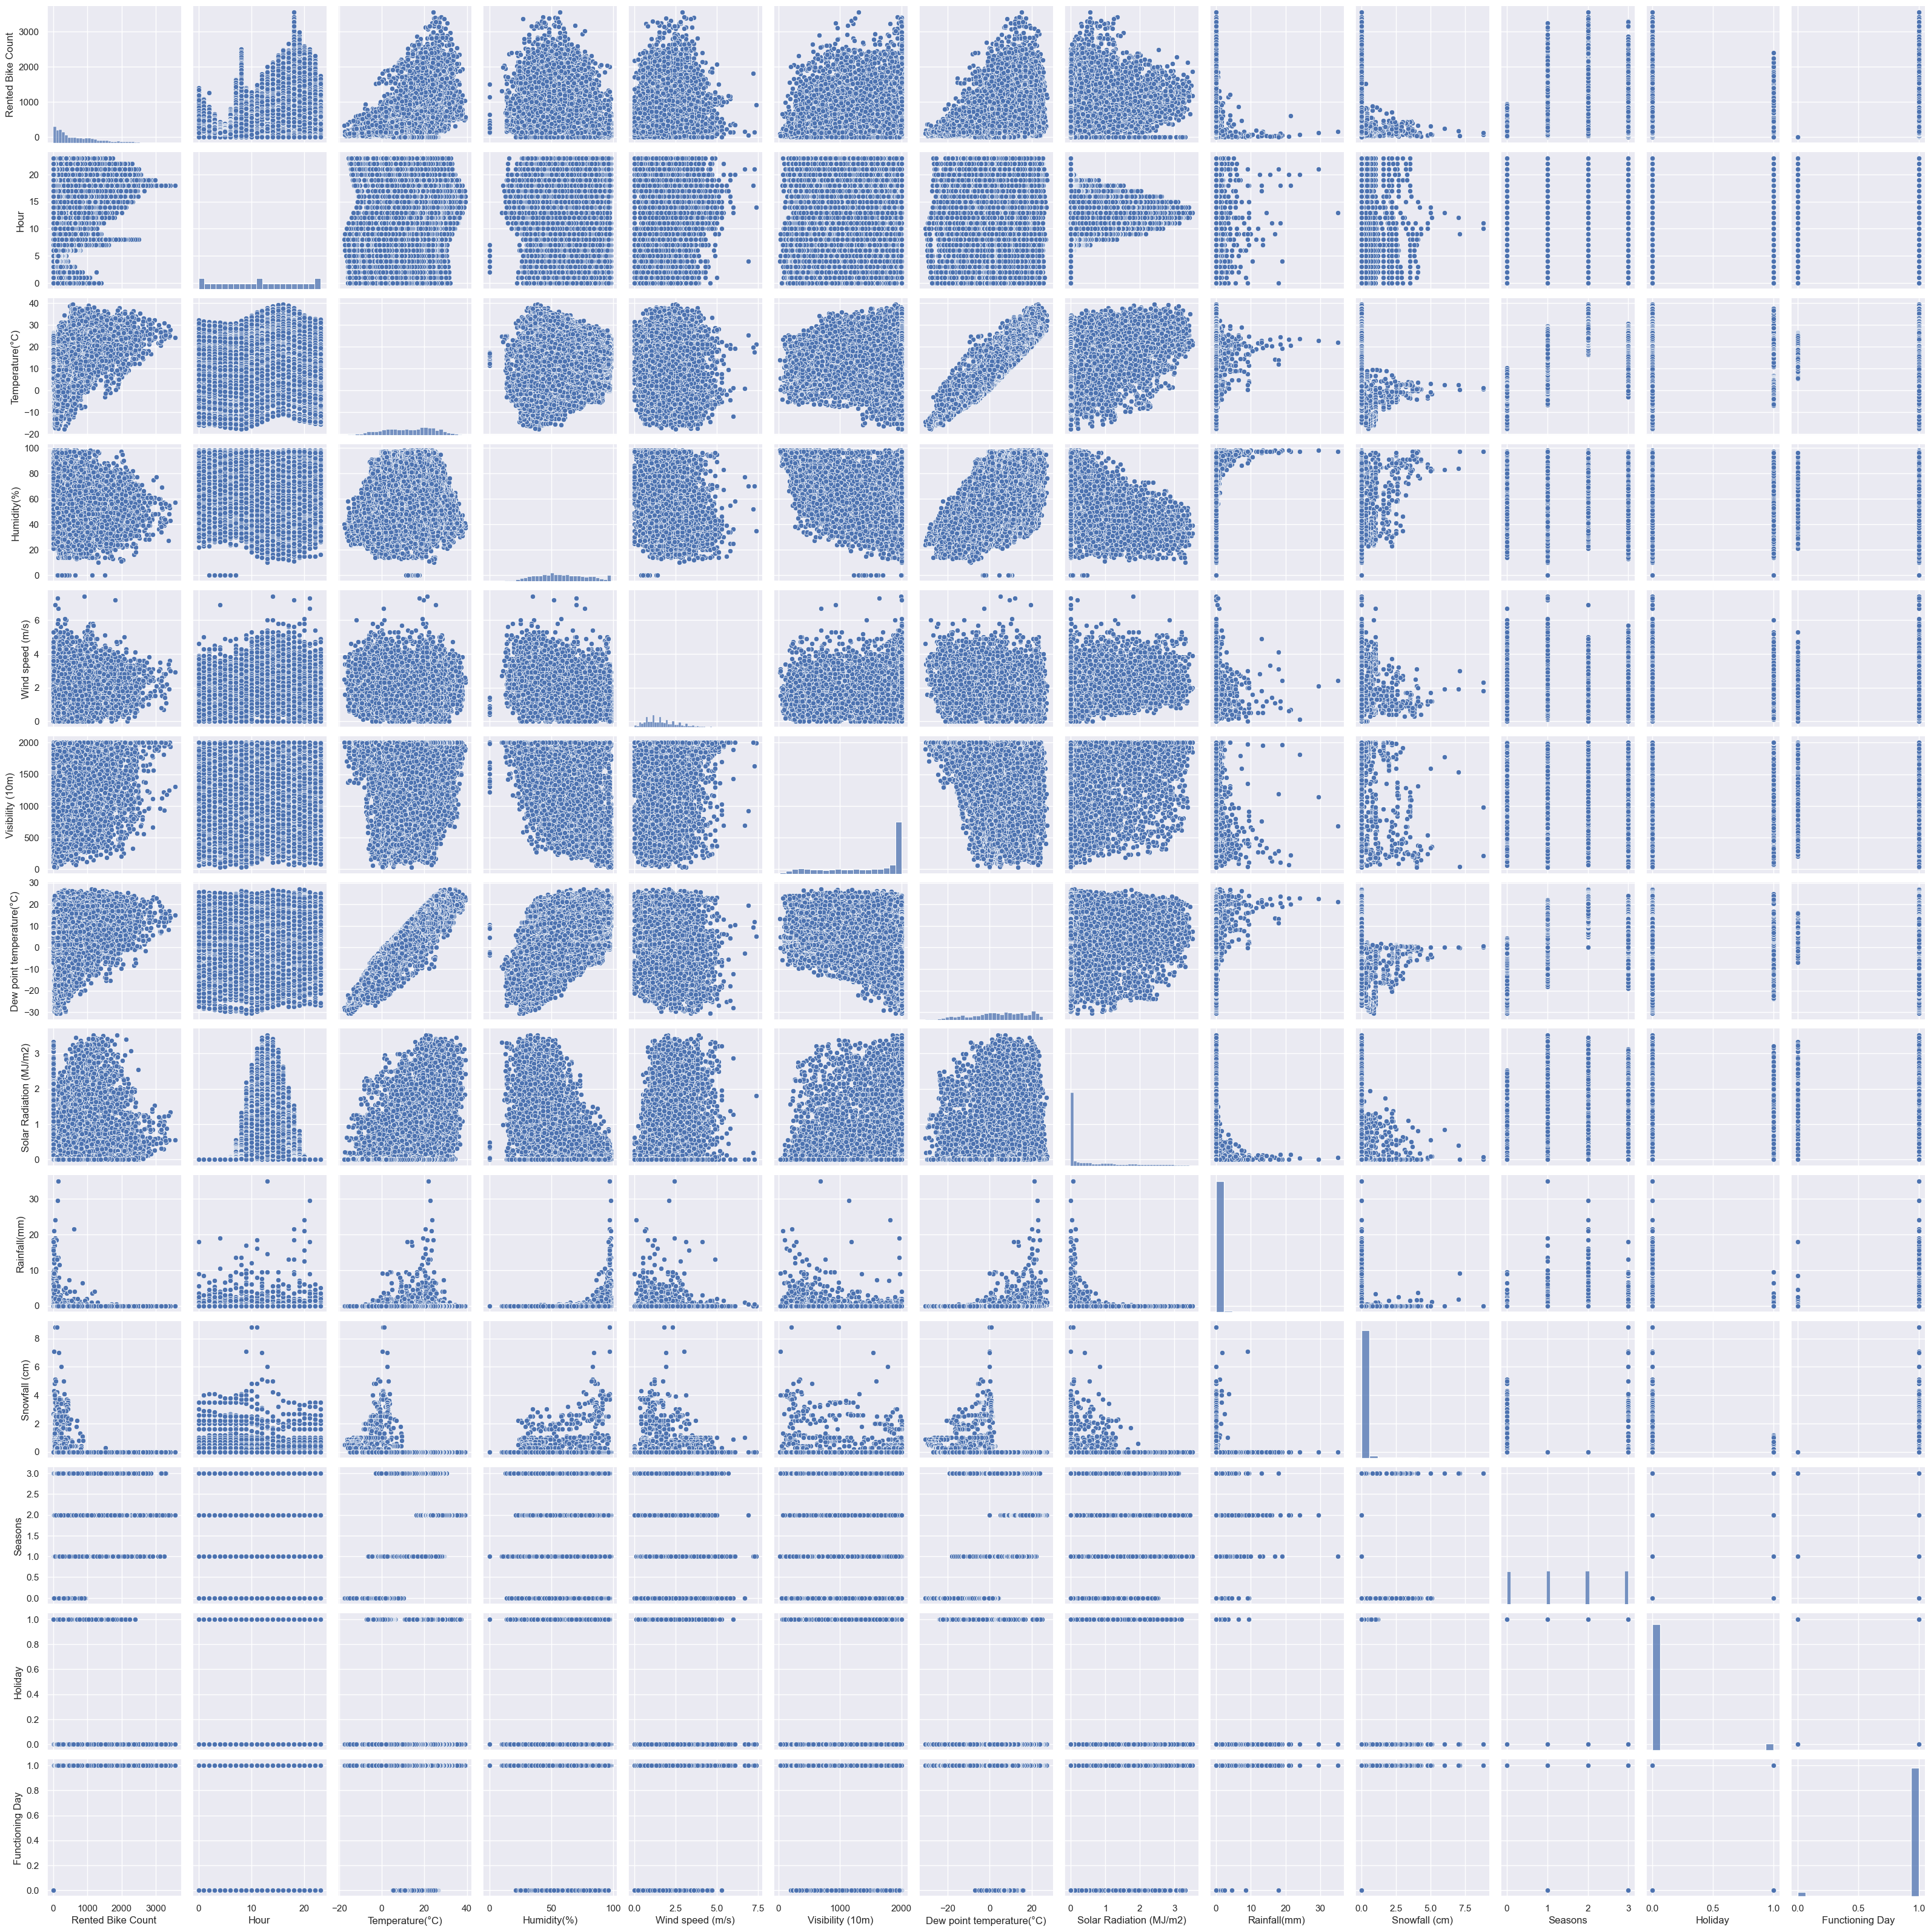

In [25]:
sns.pairplot(data = bike)

<Axes: >

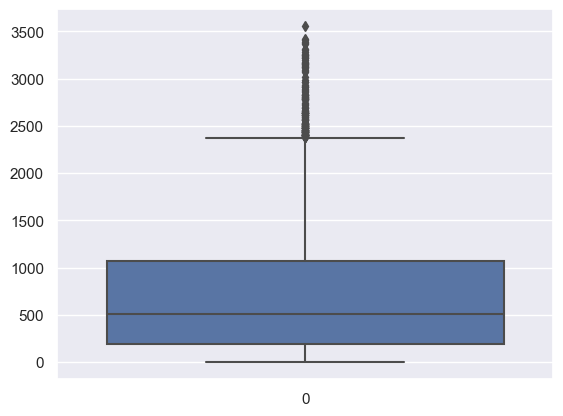

In [26]:
sns.boxplot(data = bike["Rented Bike Count"])

In [35]:
bike_split = bike.drop(["Rented Bike Count", "Date"], axis = 1)

In [36]:
rbc = bike[["Rented Bike Count"]]

# DROP THE COLLUM DATE FIRST

should I standardize before I change my variables from categorical to numerical? 

should I do PCA?



In [37]:
X = bike_split

y = rbc

In [40]:
X.head(3)

Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0     0             -5.2           37               2.2              2000   
1     1             -5.5           38               0.8              2000   
2     2             -6.0           39               1.0              2000   

   Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0                      -17.6                      0.0           0.0   
1                      -17.6                      0.0           0.0   
2                      -17.7                      0.0           0.0   

   Snowfall (cm)  Seasons  Holiday  Functioning Day  
0            0.0        0        0                1  
1            0.0        0        0                1  
2            0.0        0        0                1

In [41]:
y.head(3)

Rented Bike Count
0                254
1                204
2                173

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

In [42]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8760, 12), (8760, 1), (7008, 13), (1752, 13), (7008, 1), (1752, 1))

In [ ]:


# Create an object using Standard scalscaler
scaler = StandardScaler()

# Train the StandardScaler model
scaler.fit(X_train)

# transform data
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)
X_scaled = scaler.transform(X)

# print dataset after scaling
print(X_train_scaled, '\t', X_test_scaled, '\t', X_scaled)